In [46]:
# Pandas se usa para la manipulación de datos
import pandas as pd
import numpy as np
# Uso de Scikit-learn para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Importar el modelo que estamos usando
from sklearn.ensemble import RandomForestRegressor
# Importar herramientas necesarias para la visualización
from sklearn.tree import export_graphviz
import pydot

import matplotlib.pyplot as plt
%matplotlib inline
# Use datetime para crear objetos de fecha para trazar
import datetime

In [30]:
# Leer datos y mostrar las primeras 5 filas
features = pd.read_csv('C:\\Users\\hades\\Downloads\\dataset práctica 1\\temps.csv')
features.head(5)


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [31]:
print('La forma de nuestras características es:', features.shape)


La forma de nuestras características es: (348, 12)


In [32]:
# Estadística descriptiva para cada columna.
features.describe()


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [33]:
# One-hot codifica los datos usando pandas get_dummies
features = pd.get_dummies(features)
# Mostrar las primeras 5 filas de las últimas 12 columnas
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [34]:
# Las target son los valores que queremos predecir
labels = np.array(features['actual'])
# Eliminar el target de las funciones
# eje 1 se refiere a las columnas
features= features.drop('actual', axis = 1)
# Guardando nombres de funciones para su uso posterior
feature_list = list(features.columns)
# Convertir a matriz numpy
features = np.array(features)

In [35]:
# Divide los datos en conjuntos de entrenamiento y prueba
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [52]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [53]:
# Las predicciones de referencia son los promedios históricos
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, y muestra el error de línea de base promedio
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [54]:
# Modelo de instancia con 1000 árboles de decisión
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entrenar el modelo en datos de entrenamiento
rf.fit(train_features, train_labels);

In [55]:
# Usando el método de predicción en los datos de prueba
predictions = rf.predict(test_features)
# Calculando los errores absolutos
errors = abs(predictions - test_labels)
# Imprimir el error absoluto medio (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [56]:
# Calculando error porcentual absoluto medio (MAPE)
mape = 100 * (errors / test_labels)
# Calcular y mostrar precisión
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


In [57]:
# Sacando un árbol del bosque
tree = rf.estimators_[5]
# Exportar la imagen a un dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Usando el dot file para crear un gráfico
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# gráfico en un archivo png
graph.write_png('C:\\Users\\hades\\Downloads\\dataset práctica 1\\RandomF\\tree.png')

In [58]:
# Limite la profundidad del árbol a 3 niveles
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extrae el arbolito
tree_small = rf_small.estimators_[5]
#guardamos el arbol como una imagen png
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('C:\\Users\\hades\\Downloads\\dataset práctica 1\\RandomF\\small_tree.png');

In [59]:
# Obteniendo importancias de características numéricas
importances = list(rf.feature_importances_)
# Lista de tuplas con variable e importancia.
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Ordenando  por las más importantes 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Imprimiendo la característica y las importancias
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [60]:
# Nuevo bosque aleatorio con solo las dos variables más importantes
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extrayendo las dos características más importantes.
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Entrenando el random forest
rf_most_important.fit(train_important, train_labels)
# Haciendo predicciones y determinar el error.
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Mostrar las métricas de rendimiento
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


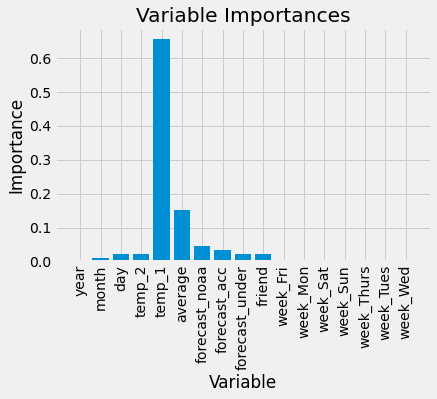

In [61]:
# Graficando
plt.style.use('fivethirtyeight')
# lista de ubicaciones x para trazar
x_values = list(range(len(importances)))
# Gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')
# Etiquetas para el eje x
plt.xticks(x_values, feature_list, rotation='vertical')
# Etiquetas y título del eje
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

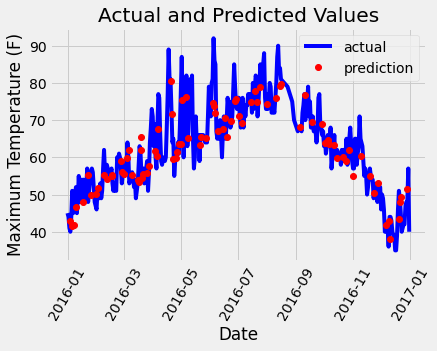

In [62]:
# Fechas de valores de entrenamiento
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# Listar y luego convertir a objeto datetime
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Marco de datos con valores verdaderos y fechas
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Fechas de predicciones
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Columna de fechas
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convertiendo a objetos de fecha y hora
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Marco de datos con predicciones y fechas
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Graficar los valores reales
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Graficar los valores predichos
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Etiquetas gráficas
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

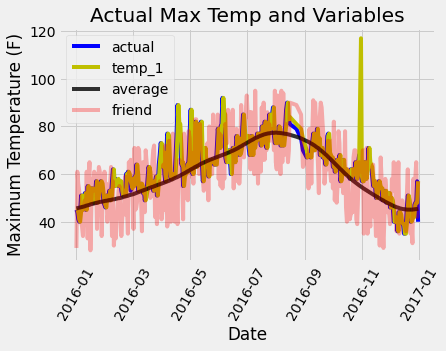

In [64]:
# Hacer los datos accesibles para trazar
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]
# Trazar todos los datos como líneas
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Trazado de formato
plt.legend(); plt.xticks(rotation = '60');
# Etiquetas y título
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');